In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import os
import sys
#оптимизация для тёмной темы 
plt.style.use('default')


covid_df = pd.read_csv(sys.path[0] + '/data/covid_df.csv', sep = ',')

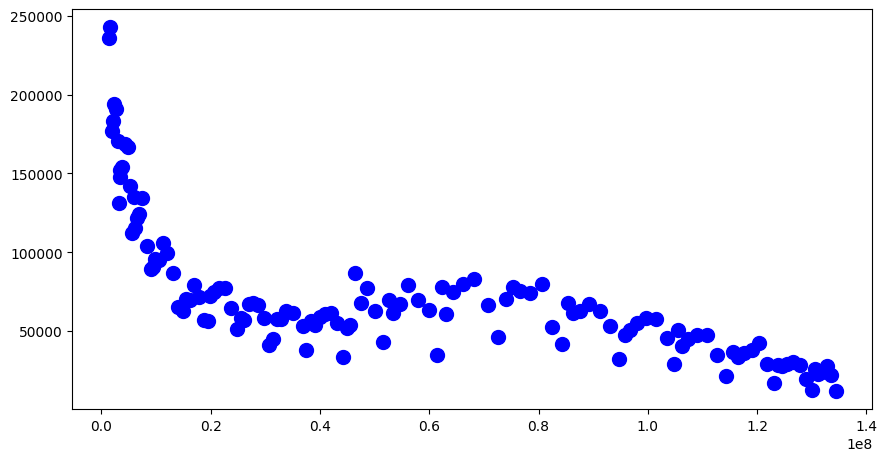

In [3]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue' 
)

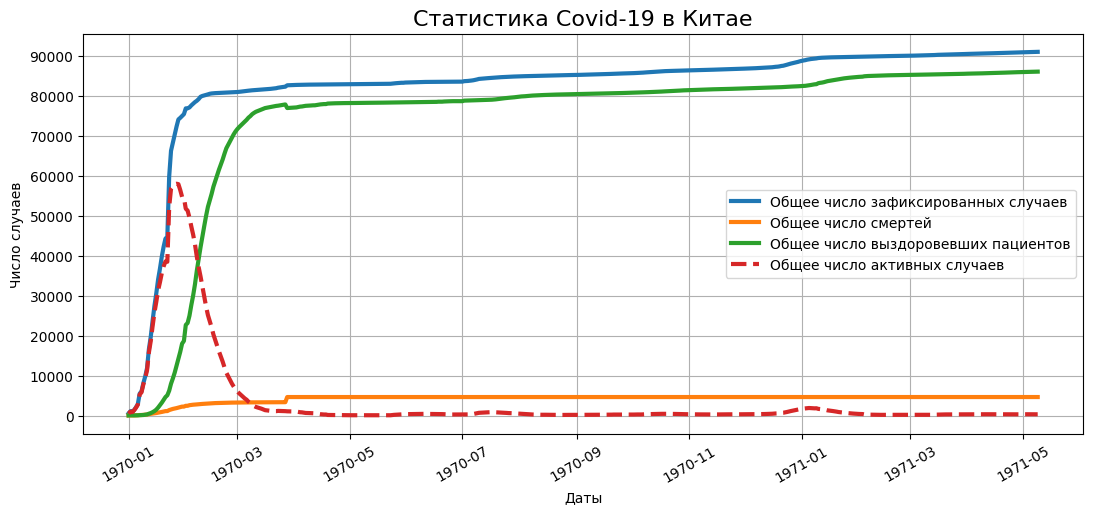

In [17]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,3,5,7,9,11)))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend()